In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


In [34]:
df=pd.read_csv(r"C:\python code\ml_project\house_price\bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [35]:
a=df['area_type'].value_counts(normalize=False)
a

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [36]:
df1=df.drop(['area_type','availability','balcony','society'	],axis=1)
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [37]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [38]:
df2=df1.dropna()

In [39]:
df2.isna().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [40]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\shish\AppData\Local\Temp\ipykernel_2444\2258653898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [41]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [42]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [43]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [44]:
is_float(df2.price)

False

In [45]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [46]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [47]:
df4 = df2.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [48]:
df5=df4.copy()
df5['price_per_sqft']=(df5.price*100000)/df5.total_sqft
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [49]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [50]:
df5.location.apply(lambda x: x.strip())
location_state=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_state

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [51]:
location_small_than_10=location_state[location_state<=10]
location_small_than_10

location
Dairy Circle            10
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Kalkere                 10
Naganathapura           10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1058, dtype: int64

In [52]:
len(df5.location.unique())

1298

In [53]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Double Road,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [54]:
df5.shape

(13200, 7)

In [55]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [56]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [57]:
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9259, 7)

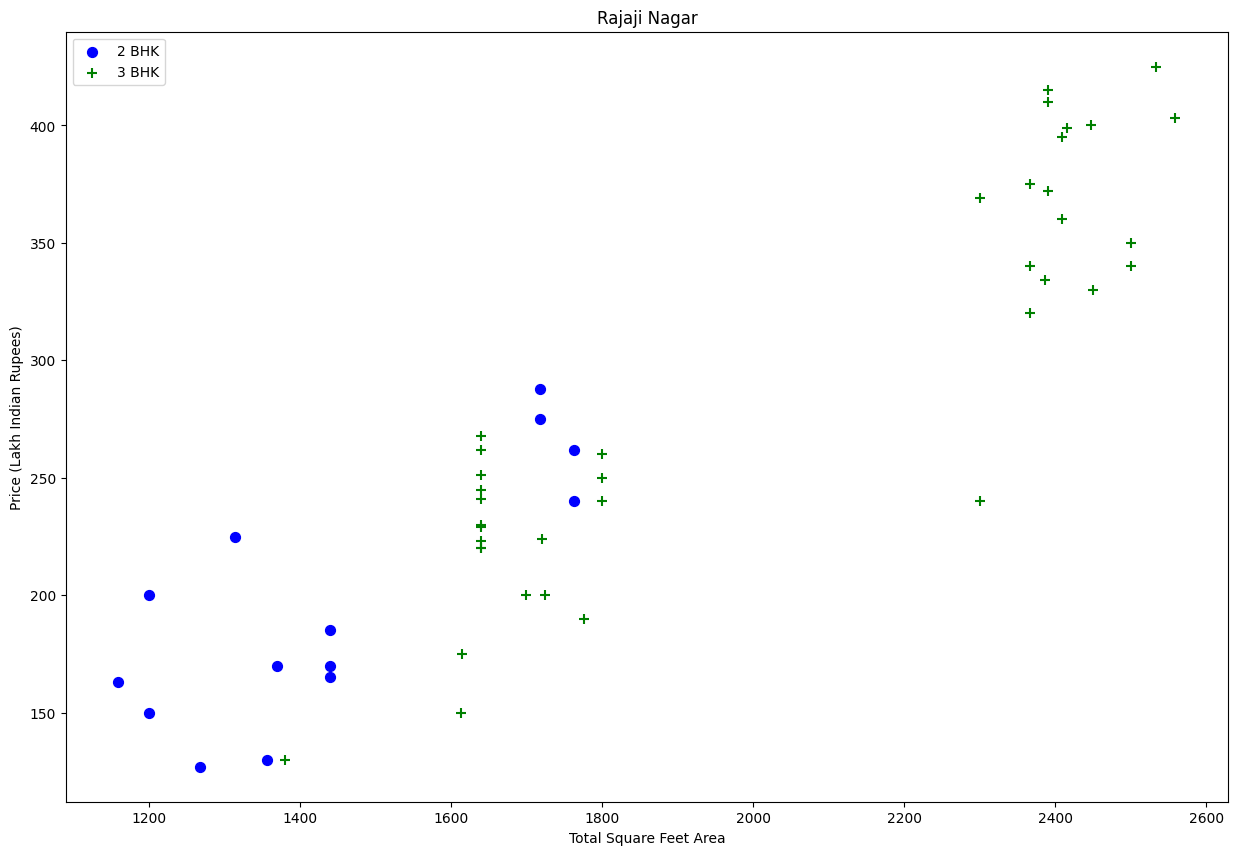

In [58]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [64]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7509, 7)

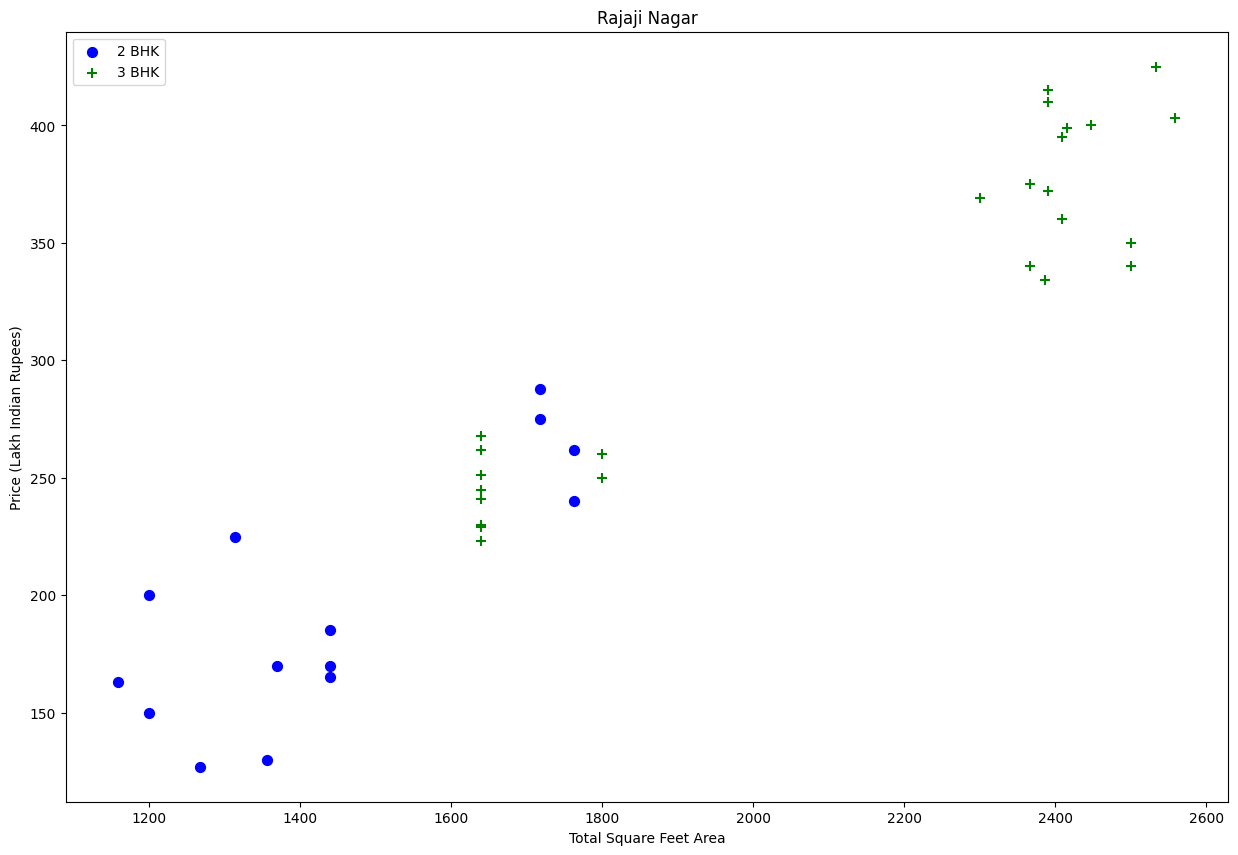

In [65]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

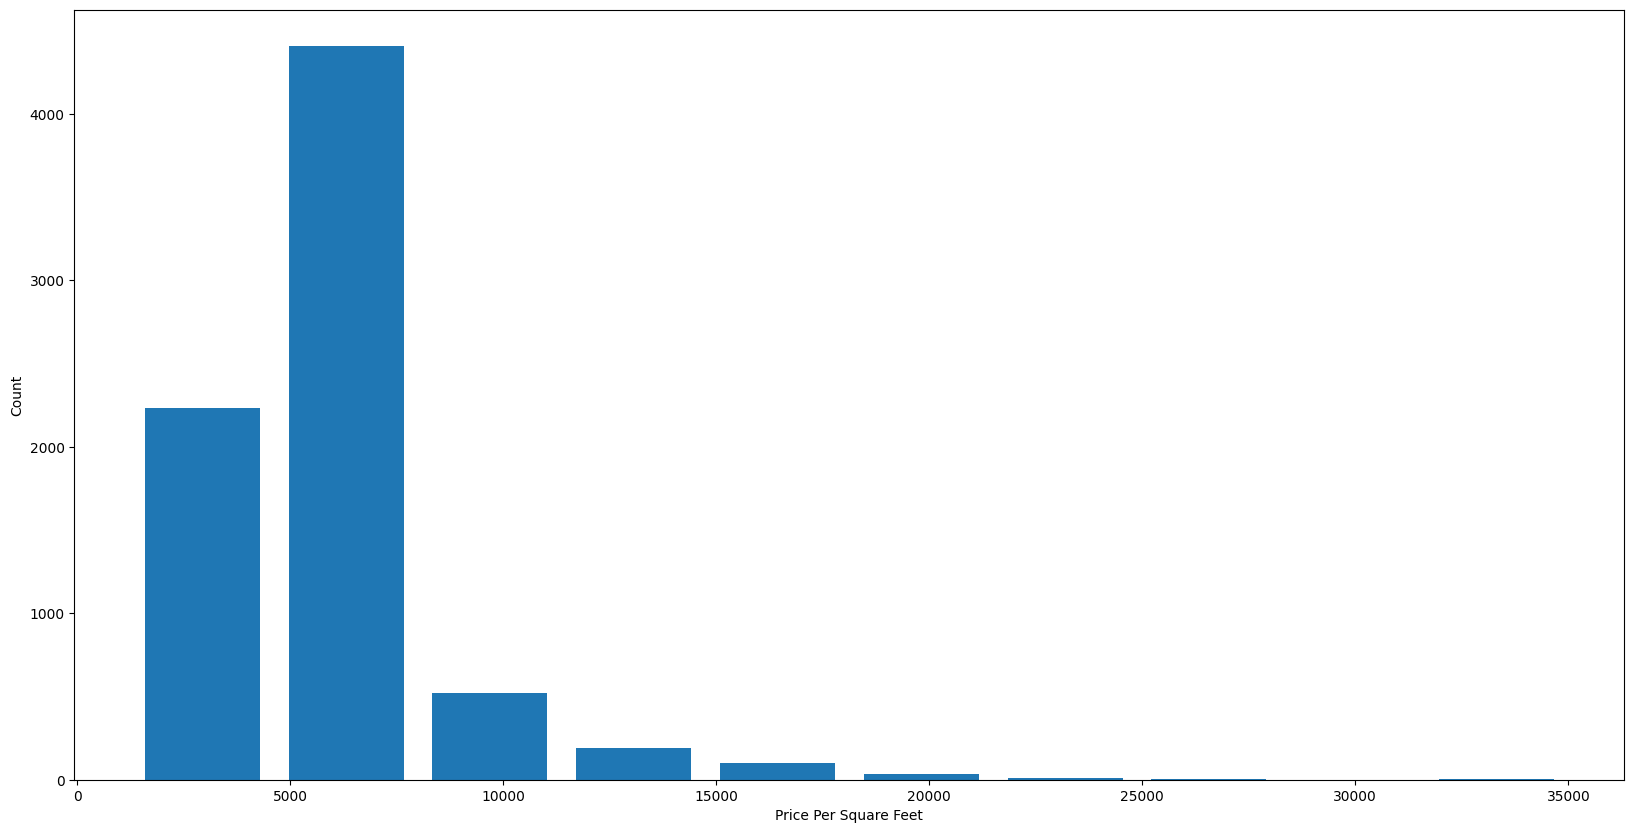

In [66]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [67]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
779,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6181,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


In [68]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
779,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1972,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6115,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7429,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7908,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [69]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7430, 7)

In [70]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7430, 7)

In [71]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3


In [72]:
dummies=pd.get_dummies(df10.location)
dummies

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [78]:
# df11=pd.concat([df10,dummies])#.drop('other',axis='columns')],axis='columns')
df11

,location,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,Devarabeesana Halli,1672.0,3.0,150.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Devarabeesana Halli,1750.0,3.0,149.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Devarabeesana Halli,1750.0,3.0,150.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Devarachikkanahalli,1250.0,2.0,40.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Devarachikkanahalli,1200.0,2.0,83.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9255,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9256,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9257,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [87]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,1672.0,3.0,150.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750.0,3.0,149.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
X = df12.drop(['price'],axis='columns')
X.head(3)
y = df12.price
y.head(3)

0    150.0
1    149.0
2    150.0
Name: price, dtype: float64

In [89]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [90]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

In [92]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
               # 'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

NameError: name 'ShuffleSplit' is not defined

In [93]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1


In [94]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

In [95]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

In [96]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [97]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))